# Machine learning with scikit-learn

### Georgios Gousios <g.gousios@tudelft.nl>

We will be predicting whether pull requests are merged, using feature engineering and classic macine learning approaches. 

First, we make sure the data is in place

In [1]:
import os
import pandas as pd

if not os.path.exists("../datasets/scala.csv"):
  url = "https://raw.githubusercontent.com/gousiosg/pullreqs/783aef46a3f1cde5663dd985325f5ee069bf841a/data/scala%40scala.csv"
  data = pd.read_csv(url)
  data.to_csv("../datasets/scala.csv")
else:
  data = pd.read_csv("../datasets/scala.csv")

Pandas reads a data frame directly from a URL, which saves us lots of trouble. Let's see what the data looks like:

In [2]:
print(data.columns)

Index(['Unnamed: 0', 'pull_req_id', 'project_name', 'lang', 'github_id',
       'created_at', 'merged_at', 'closed_at', 'lifetime_minutes',
       'mergetime_minutes', 'merged_using', 'conflict', 'forward_links',
       'team_size', 'num_commits', 'num_commit_comments', 'num_issue_comments',
       'num_comments', 'num_participants', 'files_added', 'files_deleted',
       'files_modified', 'files_changed', 'src_files', 'doc_files',
       'other_files', 'perc_external_contribs', 'sloc', 'src_churn',
       'test_churn', 'commits_on_files_touched', 'test_lines_per_kloc',
       'test_cases_per_kloc', 'asserts_per_kloc', 'watchers', 'requester',
       'prev_pullreqs', 'requester_succ_rate', 'followers', 'intra_branch',
       'main_team_member'],
      dtype='object')


Since we are doing supervised learning, we need a label to supervise our training upon. We construct it below, as a binary feature.

In [3]:
data['merged'] = data.merged_at.map(lambda x: 0 if pd.isna(x) else 1)

Let's see our data distribution

In [7]:
data.merged.value_counts()

1    2753
0     470
Name: merged, dtype: int64

Our data is skewed towards the True (1) label. Actually, 85% of our labels are True. This means that if we build a classifier that always reports True as the output label, it will be correct 85% of the time. We have to beat that! 

To simplify our training, we will only be using numerical features. Binary (or multiclass) features require a transformation called one-hot encoding, which we leave as an exercise to the reader.

In [12]:
columns = ["team_size", "num_commits", "files_changed", "perc_external_contribs",
  "num_comments", "commits_on_files_touched",  "test_lines_per_kloc",
  "prev_pullreqs", "requester_succ_rate", "num_participants"]

X = data[columns].to_numpy()
y = data.merged.to_numpy()

For evaluating our predictors, we need to split our data into training and test sets. Otherwise, we will be training and evaluating on the same data, which our classifier might have learned "by heart" (i.e. overfitted). 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

We first train a [binary logistic regression](https://en.wikipedia.org/wiki/Logistic_regression) classifier; it attempts to find the values for the coefficients of a linear function of the feature values to the output variable.

In [18]:
from sklearn.linear_model import LogisticRegression
blr = LogisticRegression(random_state=0, solver="lbfgs", max_iter=1000).\
  fit(X_train, y_train)

After the model is trained, we can get the coefficients for all the features. If we order them, we can a sense of how imporant each feature is on the output prediction.

In [19]:
for feature, coef in sorted(zip(columns, blr.coef_[0]), key=lambda x: x[1], reverse=True):
    print("{}: {}".format(feature, coef))

requester_succ_rate: 0.7707932567056638
commits_on_files_touched: 0.002985201513517729
num_comments: 0.00287620153754614
prev_pullreqs: 0.000972958806073166
files_changed: -0.00286068837336261
team_size: -0.008821429118866771
num_commits: -0.010450606903349468
perc_external_contribs: -0.011170488139997025
test_lines_per_kloc: -0.01956302907174823
num_participants: -0.09039807198121654


Let's try to predict with our trained model

In [21]:
y_predicted = blr.predict(X_test)

In [24]:
y_predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

Hmmmm.... Lots of 1s. This means that the model probably overfitted. But how can we evaluate the model's performance? Let's use precision and recall, the standard metrics for classification performance:

* Precision tells us of the predictions the model reported as True, how many are actually True.
* Recall tells us the % of the True labels the model found.

In [30]:
from sklearn.metrics import precision_score, recall_score, f1_score

print("precision:{}\nrecall:{}\nf1:{}".format(
    precision_score(y_predicted, y_test), 
    recall_score(y_predicted, y_test), 
    f1_score(y_predicted, y_test))
)

precision:1.0
recall:0.8695652173913043
f1:0.9302325581395349


Wow precision of 1 and recall of 0.86! This must be a pretty awesome model, right? Nope!

Remember, that a classifier that always reports 1, would have more or less the same results.

We need to compare our performance against the random classifier. To do that, we use the Area Under the Receiver Operating Characteristic curve (AUC-ROC). To get a sense of what this is, we plot it below:

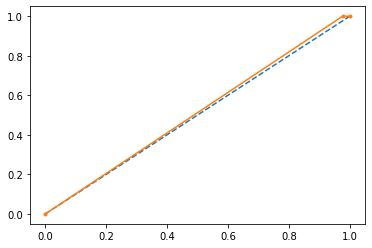

In [31]:
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot

blr_fpr, blr_tpr, thresholds = roc_curve(y_test, y_predicted)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(blr_fpr, blr_tpr, marker='.')
pyplot.show()

In [32]:
roc_auc_score(y_test, y_predicted)

0.5116279069767442

As you can see, our score is abysmal. 

Let's try a more sophisticated approach, called Random Forests. What this classifier does is that it trains multiple decision trees on random permutations of the data, and, at prediction time, takes a majority vote by consulting all those trees.

In [40]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50).\
  fit(X_train, y_train)

In [41]:
for feature, coef in sorted(zip(columns, rf.feature_importances_), key=lambda x: x[1], reverse=True):
    print("{}: {}".format(feature, coef))

commits_on_files_touched: 0.3109899464414616
test_lines_per_kloc: 0.11138705634975352
requester_succ_rate: 0.09884664830471104
prev_pullreqs: 0.09599520441916874
files_changed: 0.08258794530288405
perc_external_contribs: 0.07959674581191754
num_comments: 0.07136638884907644
num_participants: 0.056678922609242524
team_size: 0.05460291004796252
num_commits: 0.03794823186382197


In [42]:
y_predicted = rf.predict(X_test)

In [46]:
y_predicted

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

This looks more normal; we can also see that our recall has improved significantly.

In [43]:
print("precision:{}\nrecall:{}\nf1:{}".format(
    precision_score(y_predicted, y_test), 
    recall_score(y_predicted, y_test), 
    f1_score(y_predicted, y_test))
)

precision:0.9535714285714286
recall:0.9270833333333334
f1:0.9401408450704226


We can see that this classifier does much better than binary logistic regression in terms of AUC score

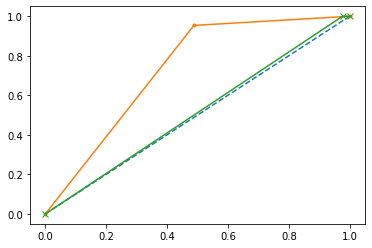

In [49]:
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, y_predicted)

pyplot.plot([0, 1], [0, 1], linestyle='--')
pyplot.plot(rf_fpr, rf_tpr, marker='.')
pyplot.plot(blr_fpr, blr_tpr, marker='x')
pyplot.show()

In [50]:
roc_auc_score(y_test, y_predicted)

0.7325996677740865